In [1]:
%matplotlib inline     
# ^Sans animations
#matplotlib notebook 
# ^Avec animations
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import random
import numpy as np
import matplotlib.colors

In [2]:
cmap = matplotlib.colors.ListedColormap(["#0099ff", "#d5d5c3"])

**Espèce menacée : la Baleine bleue**

In [3]:
class Baleine: #parametrage de la baleine
    def __init__(self,numero,age,sexe):
        self.numero=numero
        self.age=age
        self.sexe=sexe
        
    def __repr__(self):
        return "{numero} - {age} - {sexe}".format(numero=self.numero,
                                                 age=self.age,
                                                 sexe=self.sexe)
    
    def copy(self):
        return Baleine(self.numero,self.age,self.sexe)

In [4]:
#Dictionnaire de la distribution des baleines bleues
#Population de base réparti dans l'hémisphère sud PB population femelle Pf
Pb = 2300

#Population dans l'océan Atlantique A0
A0 = 920
#Population dans l'océan Pacifique P0
P0 = 1150
#Population dans l'ocean Indien I0
I0 = 230

n = 3 #nbdegeneration

#une génération dure 3 ans
#Il y a à peu près 2 enfants par générations par baleine


pop_init=[Baleine(x, # numero
                    int(random.randint(0,105)), # age 
                    random.choice(["F","M"])) #sexe
            for x in range(2300)]

In [5]:
population=pop_init

In [6]:
def mort_vieillesse(population): #parametrage des mamans baleines(["F","M"])) #sexe
    for x in range(2300):#des baleines mortes de vieillesse
        numero_mort=[] 
    for x in population:
        if int(x.age)>=100:
            numero_mort.append(x.numero)
    for i,b in enumerate(population):
        if b.numero in numero_mort:
            del population[i] #suppression des baleines mortes de population

    return population 

In [7]:
def mort_vieilles(population): #etablihoice(["F","M"])) #sexe
    for x in range(2300):#des baleines mortes de vieillesse
        numero_mort=[] 
    for x in population:
        if int(x.age)>=100:
            numero_mort.append(x.numero)
    return numero_mort

In [8]:
def reproduction(population):#selections des baleines aptes à procréer
    """
    
    """
    numero_mere=[]
    for x in population:
        if int(x.age)>=8 and int(x.age) <=75 and str(x.sexe)=='F':
            numero_mere.append(x.numero)
    if not numero_mere:
        return []
    max_numero = max([b.numero for b in population])#création de numero après num max
    
    pop_naissance = [Baleine(x,0, # age
                    random.choice(["F","M"])) for x in range(max_numero,max_numero+len(numero_mere)*2)]#naissance des nouveaux baleineaux + attribution de n°
    
    return pop_naissance
    

In [9]:
def mortX(population):
    numero_mortX=[]
    for x in population:
        if int(x.numero) not in mort_vieillesse(population) and  int(x.numero) not in  mort_vieilles(population):
            numero_mortX.append(x.numero)
    return numero_mortX

In [10]:
def mortAC(population):
    numero_mortAC=[] 
    for x in population:
        if np.random.random()<0.15:
            numero_mortAC.append(x.numero)
    return numero_mortAC

In [11]:
def mortRC(population,):#on cherche combien de baleines meurent à car cause du rechauffement climatique
    numero_mortRC=[] 
    for x in population:
        if np.random.random()<0.15:
            numero_mortRC.append(x.numero)
    return numero_mortRC# 

In [12]:
 def mortCB(population,):#on cherche combien de baleines meurent à car cause du rechauffement climatique
    numero_mortCB=[] 
    for x in population:
        if np.random.random()<0.6:
            numero_mortCB.append(x.numero)
    return numero_mortCB

In [13]:
def impact_somme(population,):#on cherche combien de baleines meurent à car cause du rechauffement climatique
    numero_mortCB=[] 
    numero_mortRC=[] 
    numero_mortAC=[]
    numero_mortX=[]
    
    for x in population:
        if np.random.random()<0.6:
            numero_mortCB.append(x.numero)
        elif np.random.random()<0.15:
            numero_mortAC.append(x.numero)
        elif np.random.random()<0.15:
            numero_mortRC.append(x.numero)
        elif np.random.random()<0.05:
            numero_mortX.append(x.numero)
    nombre_tuées_humains=numero_mortCB+numero_mortRC+numero_mortAC+numero_mortX
    return nombre_tuées_humains

In [14]:
p = {1 : 0.7,
     2 : 0.15,
     3 : 0.15,} # risques des dangers
np.testing.assert_almost_equal(sum(p.values()),1)
def mort_impact_humain(population):#somme totale des baleines mortes par impacts humains
    numero_mort_IC = []
    numero_mort_IC += mortAC(population)#nombre de morts par acidification des océans
    numero_mort_IC += mortCB(population)#nombre de morts par chasse baleinière
    numero_mort_IC += mortRC(population)#nombre de morts par réchauffement climatique
    numero_mort_IC = set(numero_mort_IC)#ensemble pour éviter les doublons (ex: mort par vieillesse mais aussi impacts humains)
    for i,b in enumerate(population):#suppression de toutes les baleines mortes 
        if b.numero in numero_mort_IC:
            del population[i]
    return population
    

In [15]:
def update_population(population):#nouvelle population < ancienne
    # 1. mort de veillesse
    # 2. mort RC+AC+BC
    # 3. Naissance
    pop = [b.copy() for b in population]
    new_population = mortX(population)
    new_population = mort_vieillesse(pop)
    #new_population = mort_impact_humain(new_population)
    new_population += reproduction(new_population)
    return new_population

In [16]:
def population_n_generations(pop_init,n):
    """
     int*dict[int:float]*int->list[int]
     ...
    """
    l= [pop_init]
    E = pop_init
    for i in range(0,n):
        E = update_population(E)
        l.append(E)
    return l
 

In [17]:
pop_i1=[Baleine(x, # numero
                    int(random.randint(0,105)), # age 
                    random.choice(["F","M"])) #sexe
        for x in range(920)]
popile = population_n_generations(pop_i1,10)
for p in pop_i1:
    print(p)

0 - 29 - M
1 - 80 - F
2 - 25 - F
3 - 83 - M
4 - 50 - M
5 - 0 - M
7 - 67 - F
8 - 26 - M
9 - 72 - F
10 - 10 - M
11 - 22 - M
12 - 53 - M
13 - 7 - F
14 - 61 - F
15 - 28 - M
17 - 87 - M
18 - 48 - M
19 - 61 - F
20 - 83 - M
21 - 79 - M
22 - 10 - F
24 - 79 - F
25 - 43 - M
26 - 46 - M
27 - 28 - F
28 - 60 - F
29 - 8 - F
30 - 29 - F
31 - 7 - M
32 - 17 - F
33 - 33 - M
34 - 95 - M
35 - 10 - M
36 - 95 - F
37 - 19 - F
38 - 53 - F
39 - 40 - F
40 - 30 - M
41 - 66 - F
42 - 96 - F
43 - 8 - F
44 - 21 - M
45 - 29 - M
46 - 17 - F
47 - 62 - F
48 - 13 - F
50 - 1 - M
51 - 44 - M
52 - 39 - M
53 - 45 - F
54 - 89 - F
55 - 52 - M
56 - 21 - M
57 - 60 - M
58 - 8 - F
60 - 48 - M
61 - 34 - F
62 - 91 - M
63 - 79 - M
64 - 69 - F
65 - 49 - F
66 - 41 - F
67 - 39 - M
68 - 39 - F
69 - 49 - M
70 - 62 - M
72 - 12 - M
73 - 94 - F
74 - 67 - F
75 - 21 - M
76 - 76 - F
77 - 91 - F
78 - 15 - F
79 - 85 - M
80 - 68 - F
81 - 89 - M
82 - 54 - M
83 - 2 - F
84 - 10 - M
85 - 24 - M
86 - 55 - F
87 - 19 - M
88 - 89 - F
89 - 80 - F
90 - 79 -

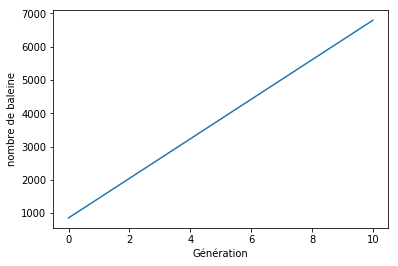

In [18]:
def plot_I1(L):
    '''
    ??-> None
    Visualise the evolution of the population in 'L'
    '''

    plt.figure()
    plt.plot([len(b) for b in L],)
    plt.ylabel("nombre de baleine")
    plt.xlabel("Génération")
    plt.show()
    return
plot_I1(popile)

In [19]:
pop_i2=[Baleine(x, # numero
                    int(random.randint(0,105)), # age 
                    random.choice(["F","M"])) #sexe
            for x in range(1150)]

In [20]:
popile2 = population_n_generations(pop_i2,10)
for p in pop_i2:
    print(p)

0 - 21 - M
2 - 39 - M
3 - 11 - M
4 - 19 - M
5 - 49 - F
6 - 45 - M
7 - 60 - F
8 - 89 - F
9 - 41 - M
10 - 19 - M
11 - 37 - M
12 - 5 - M
13 - 69 - F
14 - 50 - F
15 - 99 - M
16 - 67 - F
17 - 96 - M
18 - 79 - M
19 - 96 - M
20 - 64 - F
21 - 60 - F
22 - 64 - F
23 - 50 - F
25 - 13 - M
26 - 97 - F
27 - 96 - F
28 - 14 - M
29 - 79 - M
30 - 69 - M
32 - 64 - M
33 - 11 - F
34 - 32 - F
35 - 14 - M
36 - 49 - F
37 - 71 - M
38 - 24 - F
39 - 57 - M
40 - 25 - F
41 - 51 - M
43 - 61 - M
44 - 80 - F
45 - 66 - M
46 - 23 - M
47 - 54 - M
48 - 61 - M
49 - 33 - M
50 - 48 - F
51 - 72 - M
52 - 66 - M
53 - 56 - M
54 - 6 - F
55 - 3 - F
56 - 2 - F
57 - 94 - M
58 - 94 - F
59 - 51 - F
60 - 61 - M
61 - 44 - F
62 - 96 - F
63 - 23 - F
64 - 60 - M
65 - 64 - M
67 - 82 - M
68 - 10 - M
69 - 90 - F
70 - 28 - M
71 - 12 - F
73 - 98 - M
74 - 16 - M
75 - 83 - M
77 - 59 - M
78 - 61 - M
79 - 3 - F
80 - 16 - F
82 - 7 - M
83 - 99 - M
84 - 51 - F
85 - 5 - M
86 - 21 - F
87 - 57 - F
88 - 39 - F
89 - 41 - M
90 - 25 - F
91 - 2 - M
92 - 47 -

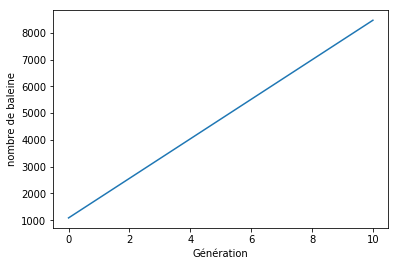

In [21]:
def plot_I2(L):
    '''
    ??-> None
    Visualise the evolution of the population in 'L'
    '''

    plt.figure()
    plt.plot([len(b) for b in L])
    plt.ylabel("nombre de baleine")
    plt.xlabel("Génération")
    plt.show()
    return
plot_I2(popile2)

In [22]:
pop_i3=[Baleine(x, # numero
                    int(random.randint(0,105)), # age 
                    random.choice(["F","M"])) #sexe
            for x in range(230)]

In [23]:
popile3 = population_n_generations(pop_i3,10)
for p in pop_i3:
    print(p)

0 - 57 - M
1 - 81 - F
2 - 93 - F
3 - 79 - F
4 - 66 - M
6 - 98 - M
7 - 47 - F
8 - 21 - F
9 - 89 - F
10 - 45 - M
11 - 94 - F
13 - 42 - M
14 - 67 - F
15 - 76 - M
16 - 87 - F
17 - 53 - M
18 - 21 - F
19 - 78 - F
20 - 86 - F
21 - 0 - M
22 - 90 - M
24 - 15 - M
26 - 70 - F
27 - 55 - F
28 - 10 - M
29 - 47 - M
30 - 73 - M
31 - 63 - M
32 - 17 - F
33 - 52 - M
34 - 94 - F
35 - 3 - F
36 - 79 - M
37 - 25 - M
38 - 81 - M
39 - 32 - M
41 - 81 - F
42 - 3 - F
43 - 33 - M
44 - 39 - F
45 - 56 - F
46 - 22 - F
47 - 91 - F
48 - 78 - F
49 - 19 - F
50 - 32 - F
51 - 18 - F
52 - 96 - M
53 - 32 - F
55 - 57 - F
56 - 7 - M
58 - 63 - M
59 - 90 - F
60 - 58 - M
61 - 24 - M
62 - 66 - M
63 - 11 - M
64 - 30 - M
65 - 11 - F
66 - 90 - M
67 - 8 - M
68 - 12 - F
69 - 85 - M
71 - 95 - F
72 - 54 - M
73 - 96 - M
74 - 49 - F
75 - 84 - F
76 - 1 - M
77 - 14 - F
78 - 55 - M
79 - 29 - F
80 - 10 - M
81 - 4 - F
83 - 88 - F
84 - 39 - F
85 - 77 - M
86 - 4 - F
87 - 62 - M
88 - 11 - M
89 - 1 - F
90 - 99 - F
91 - 65 - M
92 - 45 - M
93 - 44 - 

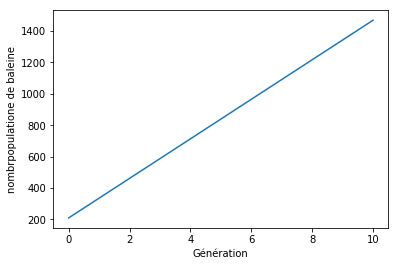

In [24]:
def plot_I3(L):
    '''
    ??-> None
    Visualise the evolution of the population in 'L'
    '''

    plt.figure()
    plt.plot([len(b) for b in L])
    plt.ylabel("nombrpopulatione de baleine")
    plt.xlabel("Génération")
    plt.show()
    return
plot_I3(popile3)

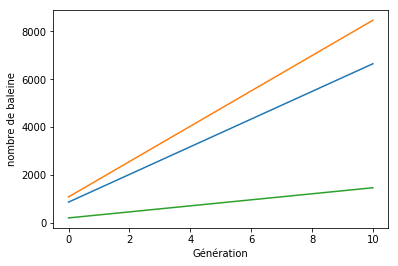

In [25]:
def all_plot(F,N,Z):
    plt.figure()
    plt.plot([len(b) for b in F],)
    plt.plot([len(b) for b in N], )
    plt.plot([len(b) for b in Z],)
    plt.ylabel("nombre de baleine")
    plt.xlabel("Génération")
    plt.show()
    return
all_plot(popile,popile2,popile3)
    

In [ ]:
tuéé=len(impact_somme(population)+mort_vieilles(population))

In [ ]:
A = np.zeros((23,100))

In [ ]:
def matrice_bal(tuéé, A):
    i= np.random.randint(23)
    j= np.random.randint(100) 
    for f in range(tuéé):
        while A[i,j] != 0.:
            i= np.random.randint(23)
            j= np.random.randint(100)
        A[i,j]=1.
    return A
    
    
    
    
    
    
    
    
    

In [ ]:
matrice_bal(tuéé, A)

In [ ]:
def liste_mort_generation(population):
    fr=impact_somme(population,)
    fr+=mort_vieilles(population)
    return len(fr)
    
    

In [ ]:
def liste_mort_generation2(population):
    gr=[]
    while len(population) !=0:
        gr.append(liste_mort_generation(population))
        population=mort_impact_humain(population)
        population=mort_vieillesse(population)
    return gr

In [ ]:
liste_mort_generation2(population)

In [ ]:
numero_mere=reproduction(population)

In [ ]:
numero_mere

In [ ]:
len (numero_mere)

Premier bilan: Sans les impacts humains les baleines ne sont pas en voie de disparition car au bout de n generations il y aura toujours plus de baleines qui naissent que de baleines qui meurent

Actions humaines affectant la reproduction des baleines

- chasses baleiniere commerciales[1]

- conditions/rechauffement climatique [2]

- acidification des océans[3]


In [ ]:
#dictionnaire representant la distribution des dangers pour la baleine
#clef=probabilité du danger
p={1:0.6,
   2:0.15,  
   3:0.15}

In [ ]:
p

In [ ]:
numero_mortRC=mortRC(population)

In [ ]:
len(numero_mortRC)

In [ ]:
len(population)

In [ ]:
numero_mortCB=mortCB(population)

In [ ]:
numero_mortCB

In [ ]:
len(numero_mortCB)

In [ ]:
numero_mortAC=mortAC(population)

In [ ]:
numero_mortAC

In [ ]:
len(numero_mortAC)

In [ ]:
len(numero_mortRC)+len(numero_mortAC)+len(numero_mortCB)#nombre de mort par les impacts humains

In [ ]:
len(numero_mortRC)+len(numero_mortAC)+len(numero_mortCB)+len(numero_mort)#nombre de mort total sur 2300 baleines

 pour une generation il y moins de naissance que de deces cela montre l'importance des actes humains sur l'extinctions des baleines

In [ ]:
def generation_variante2():#inspiration du modele de gatson-island
    p_new={}
    p_new['A0'] = p['A0']*(1-2*m)+p['IO']*m+p['P0']*m
    p_new['I0'] = p['I0']*(1-2*m)+p['A0']*m+p['P0']*m
    p_new['P0'] = p['P0']*(1-2*m)+p['I0']*m+p['A0']*m
    return p_new

In [ ]:
#Nous utiliserons les paramètres suivants.
F={'Pb': 2300,
   'A0': 920,
   'P0': 1150,
   'I0': 230,}

p = {'A0': 0.5,
    'I0' : 0.4,
    'P0' : 0.8} # PROBABILITÉ DE MOUVEMENT DES BALEINES 

m = {('A0','P0') : 0.3, # probabilité de migration des baleines entre l'ile 'A0' et 'P0'
     ('P0','A0') : 0.3, # probabilité de migration des baleines entre l'ile 'P0' et 'A0'
     ('I0','A0') : 0.5, # probabilité de migration des baleines entre l'ile 'I0' et 'A0'
     ('A0','I0') : 0.5, # probabilité de migration des baleines entre l'ile 'A0' et 'I0'
     ('P0','I0') : 0.2, # probabilité de migration des baleines entre l'ile 'P0' et 'I0'
     ('I0','P0') : 0.2} # probabilité de migration des baleines entre l'ile 'I0' et 'P0'
n=3
animated_populations(F,p,m,n)

In [ ]:
def update_populations_with_migrations():
    

In [19]:

def animated_populations(Z,P,M,n):#pour creer les plots afin de visualiser la migration des baleines
    n_island = len(Z)
    pop_dict = {0:Z}
    for i in range(n):
        Z = update_populations_with_migrations(Z,P,M)
        pop_dict[i]=Z.copy()
    pop_df = pd.DataFrame.from_dict(pop_dict,orient='index')
    fig = plt.figure()
    cmap = plt.get_cmap('tab10')
    barplot = plt.bar(range(n_island),pop_df.max(),color=[cmap(i) for i in range(n_island)])
    def animate(i):
        populations = pop_df.iloc[i,:]
        for j,b in enumerate(barplot):
            b.set_height(populations[j])
    plt.tick_params(top=False,right=False)
    plt.xticks(range(n_island),["Island "+str(i) for i in Z.keys()])
    plt.ylabel("Population")
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    anim = animation.FuncAnimation(fig,animate,blit=False,
                                  frames = n,interval=300,repeat=False)
    #anim.save('mymovie.mp4',writer=animation.FFMpegWriter(fps=10))
    return anim